<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysisPt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS 3**

## **0 Inizializzazione**

In [1]:
import networkx as nx
import pandas as pd
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [4]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [27]:
nodes = G.nodes()
edges = G.edges()

bridges_g = nx.bridges(G)
bridges= []
for edge in bridges_g:
  bridges.append(edge)

pos = nx.spring_layout(G)

In [23]:
bridges

[('115', '198'), ('35', '49'), ('70', '197'), ('163', '162'), ('175', '195')]

In [24]:
ed = list(bridges)
len(ed)

5

I ponti che ha il grafo sono i seguenti: [('115', '198'), ('35', '49'), ('70', '197'), ('163', '162'), ('175', '195')]


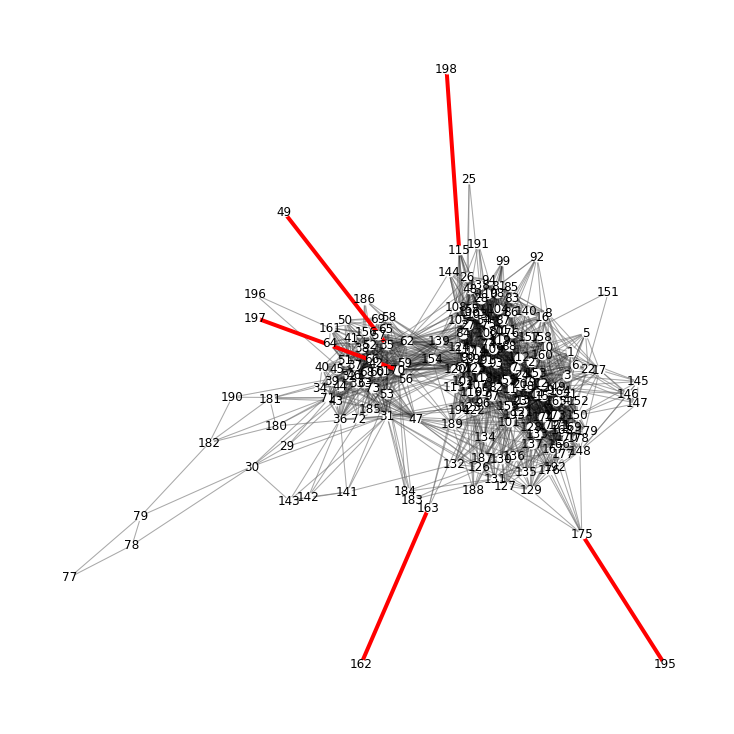

In [38]:
print(f'I ponti che ha il grafo sono i seguenti: {bridges}')
plt.figure(figsize=(10,10))
nx.draw(G, pos, node_color='white', node_size=80, 
        with_labels=True, edge_color="lightgrey")
edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=bridges, nodelist=bridges, edge_color="red", width=4)
plt.show()